In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DATASET/steam.csv')

In [3]:
genre = pd.read_csv('DATASET/steamspy_tag_data.csv')

In [4]:
df.head(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [5]:
df.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

In [6]:
# Intervalles du nombre de téléchargement par jeu 

df['owners'].value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

<AxesSubplot:>

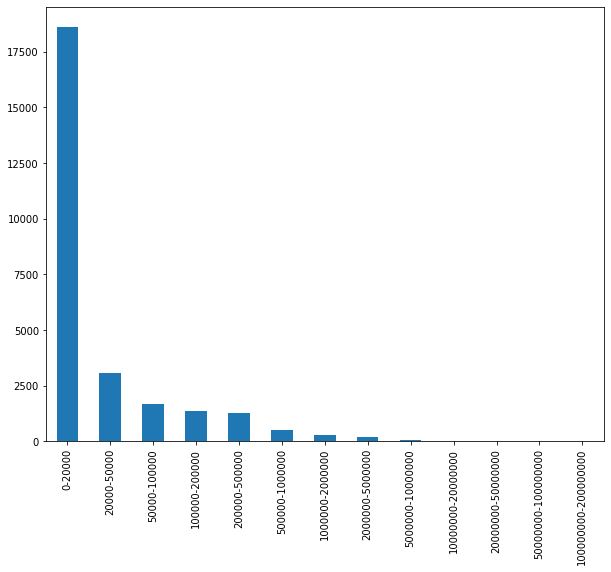

In [7]:
# Répartitions du nombre de téléchargements des jeux

df['owners'].value_counts().plot(kind='bar', figsize=(10,8))

In [8]:
# Convert date to datetime format

df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
df.dtypes

appid                        int64
name                        object
release_date        datetime64[ns]
english                      int64
developer                   object
publisher                   object
platforms                   object
required_age                 int64
categories                  object
genres                      object
steamspy_tags               object
achievements                 int64
positive_ratings             int64
negative_ratings             int64
average_playtime             int64
median_playtime              int64
owners                      object
price                      float64
dtype: object

## Distribution des 100 Developer qui ont produit le plus de jeux 

<AxesSubplot:>

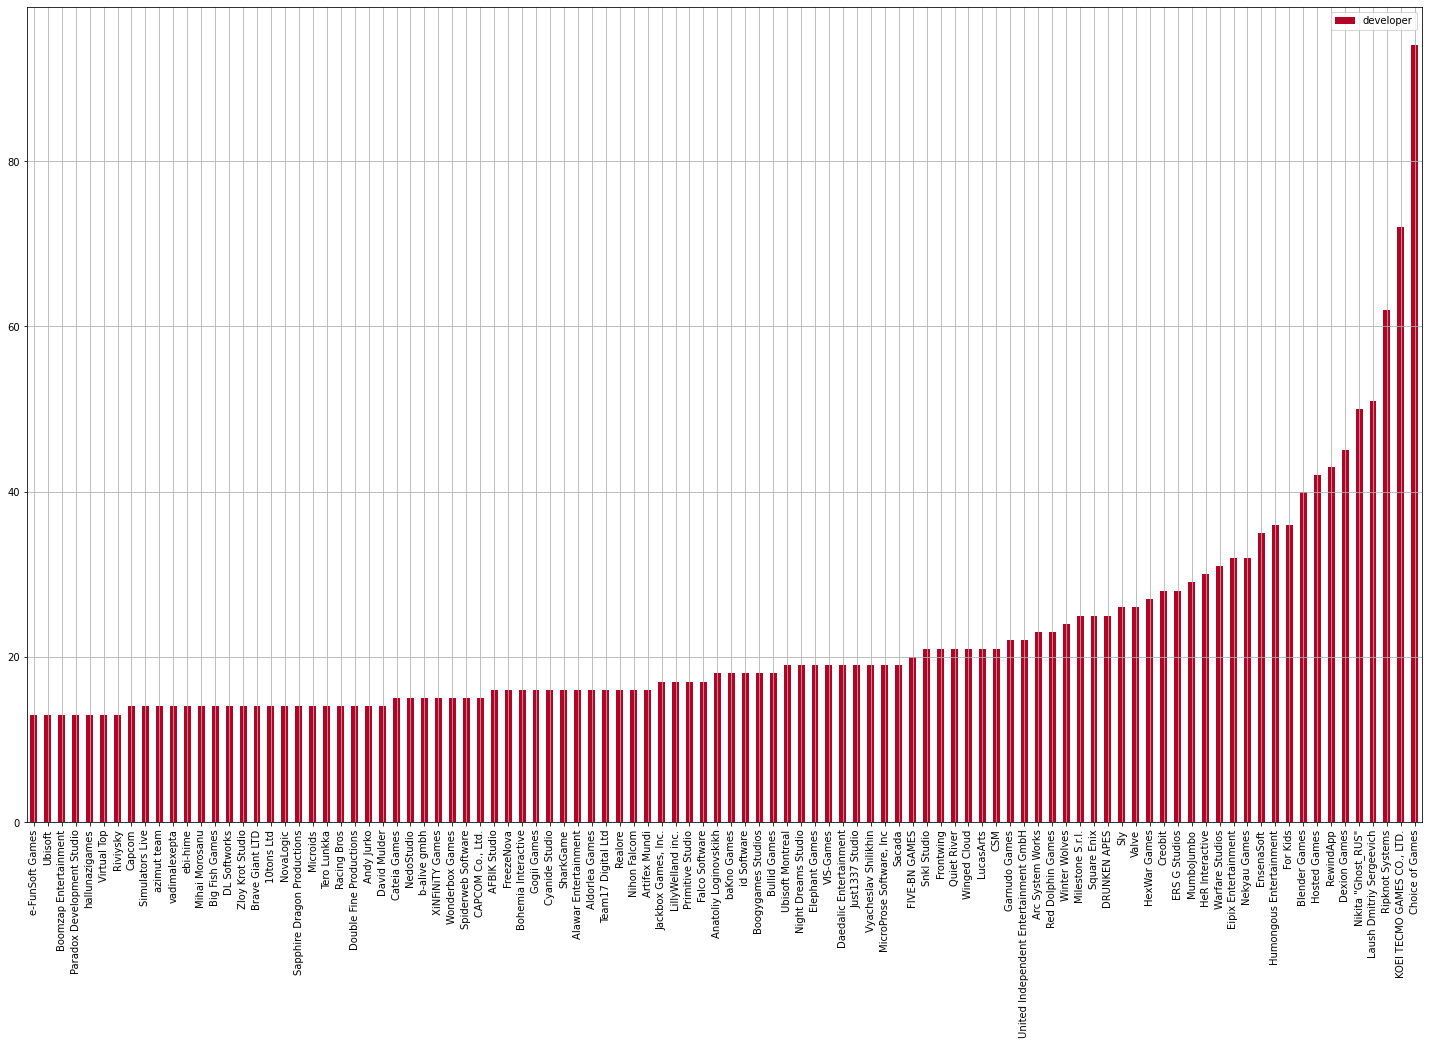

In [10]:
df['developer'].value_counts().head(100).sort_values().plot(kind = 'bar',figsize=(25,15), colormap='coolwarm_r', grid=True, legend=True)

## Distribution des 100 Developer qui ont produit le moins de jeux 


<AxesSubplot:>

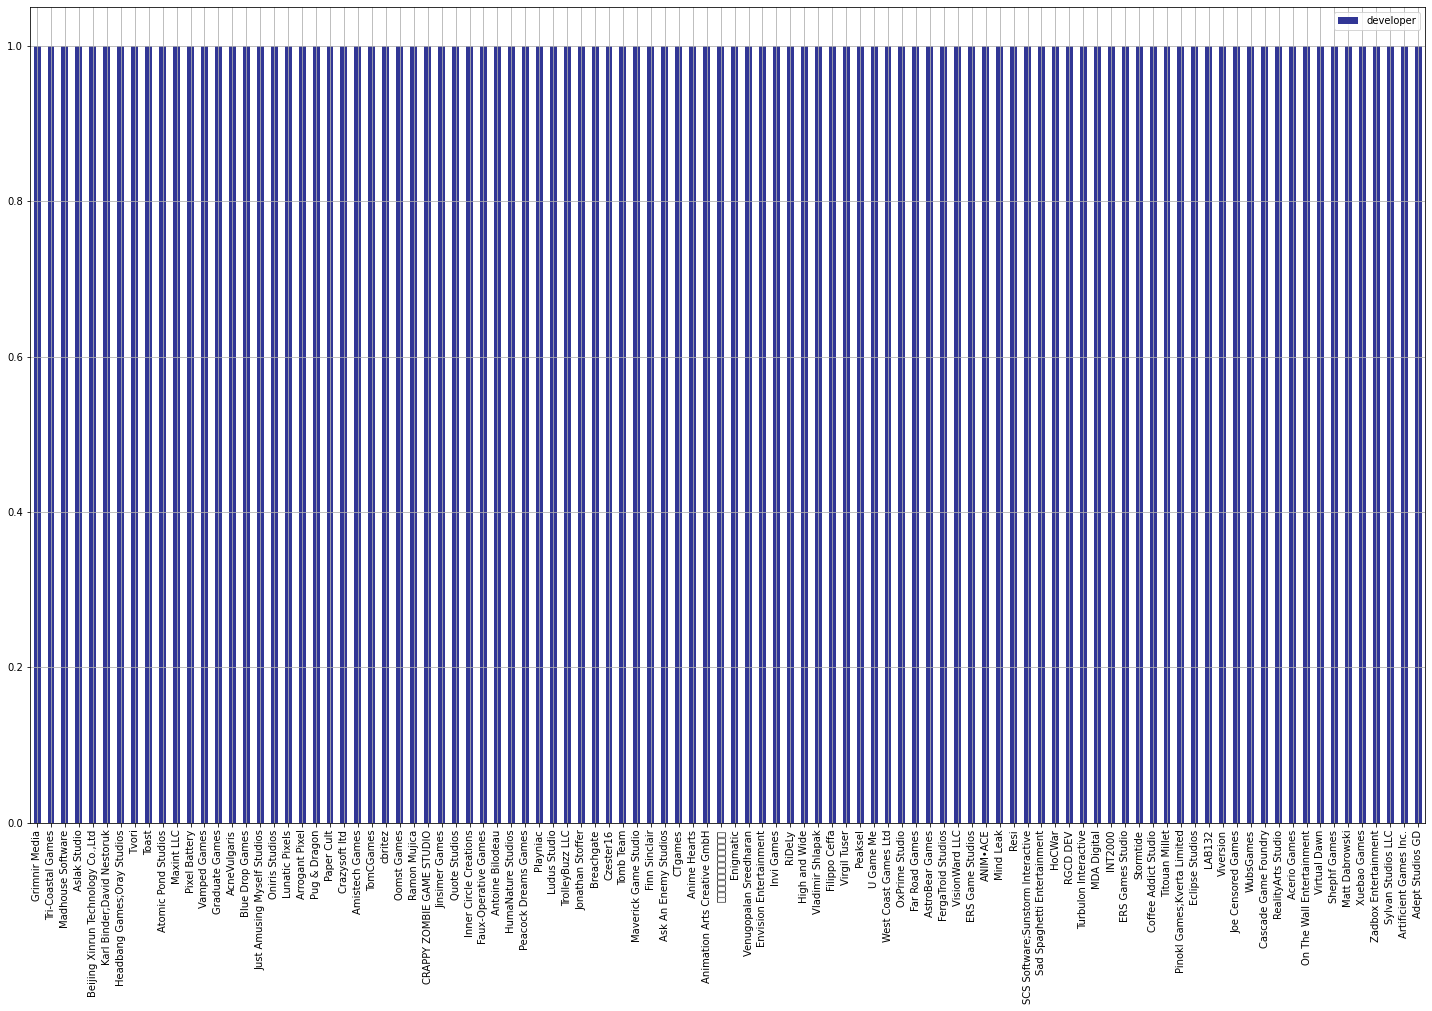

In [11]:
df['developer'].value_counts().tail(100).sort_values().plot(kind = 'bar',figsize=(25,15), colormap='RdYlBu_r', grid=True, legend=True)

In [12]:
# Nombre de developer uniques 

df['developer'].nunique()

17113

## Nombre de jeux released par année 

In [13]:
df['release_date'].min(), df['release_date'].max()

(Timestamp('1997-06-30 00:00:00'), Timestamp('2019-05-01 00:00:00'))

In [14]:
df['release_date'].dt.year.value_counts()

2018    8160
2017    6357
2016    4361
2015    2597
2019    2213
2014    1555
2013     418
2012     320
2009     305
2011     239
2010     238
2008     145
2007      93
2006      48
2005       6
2004       6
2001       4
2003       3
2000       2
1999       2
2002       1
1998       1
1997       1
Name: release_date, dtype: int64

<AxesSubplot:>

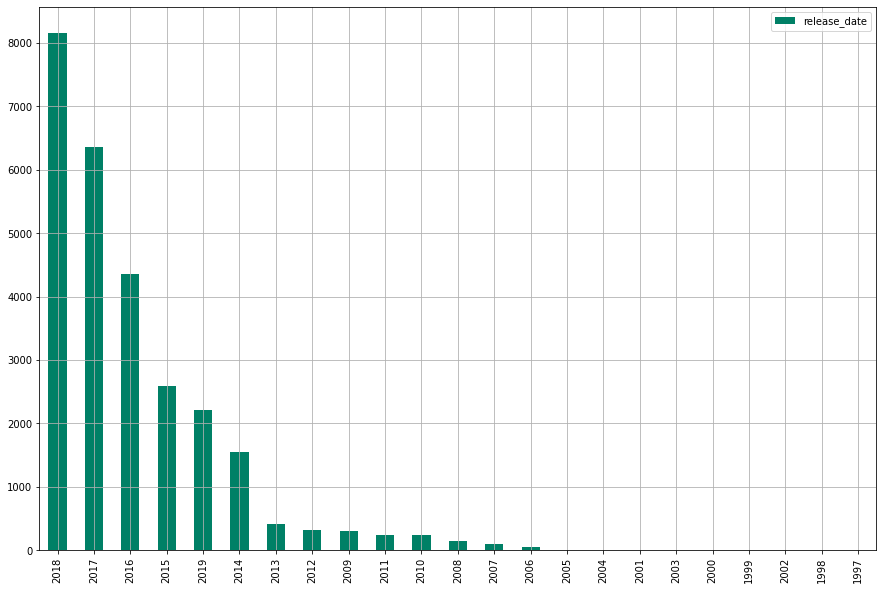

In [15]:
df['release_date'].dt.year.value_counts().plot(kind = 'bar',figsize=(15,10), colormap='summer', grid=True, legend=True)

## Répartition des Positive/Negative ratings

In [16]:
name_prate = df[['name','positive_ratings']].set_index(keys='name').sort_values(by='positive_ratings',ascending=False)

In [17]:
name_nrate = df[['name','negative_ratings']].set_index(keys='name').sort_values(by='negative_ratings',ascending=False)

<AxesSubplot:ylabel='name'>

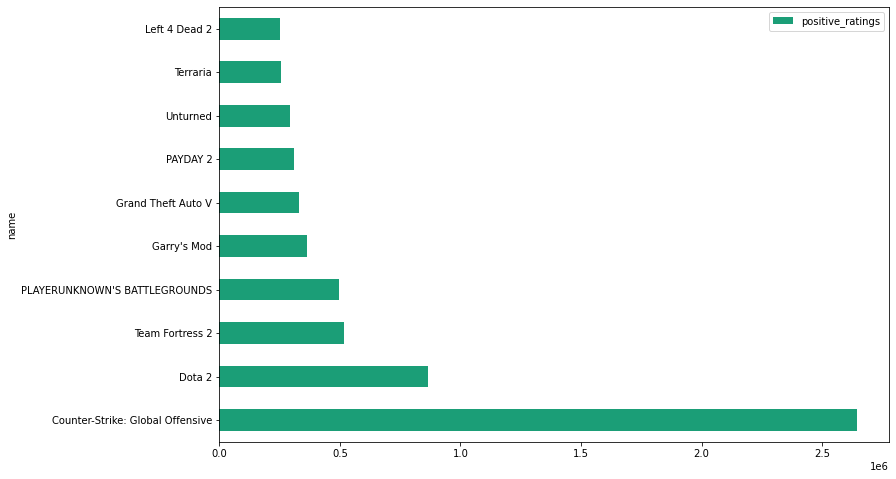

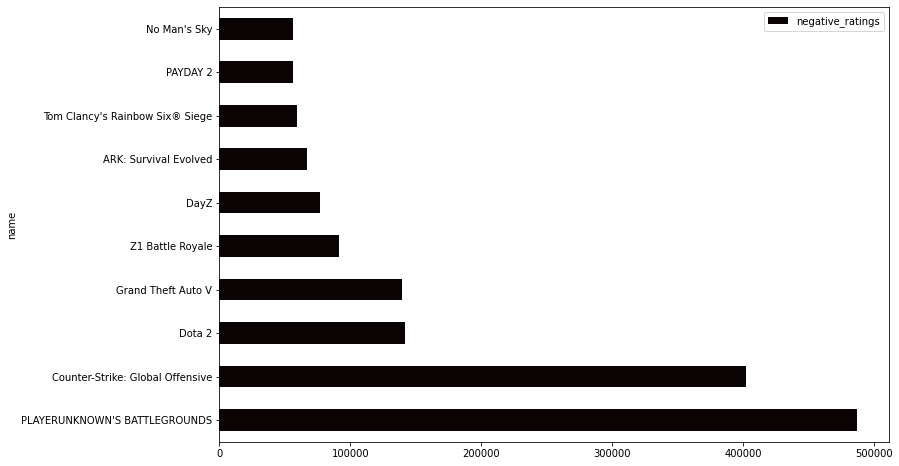

In [18]:
name_prate.head(10).plot(kind='barh',figsize=(12,8),colormap='Dark2'),

name_nrate.head(10).plot(kind='barh',figsize=(12,8),colormap='mako')

## Répartition du price 

In [19]:
df['price'].describe()

count    27075.000000
mean         6.078193
std          7.874922
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        421.990000
Name: price, dtype: float64

In [20]:
name_price = df[['name','price']].set_index(keys='name')

In [44]:
price = df[df['price'] < 150]['price']


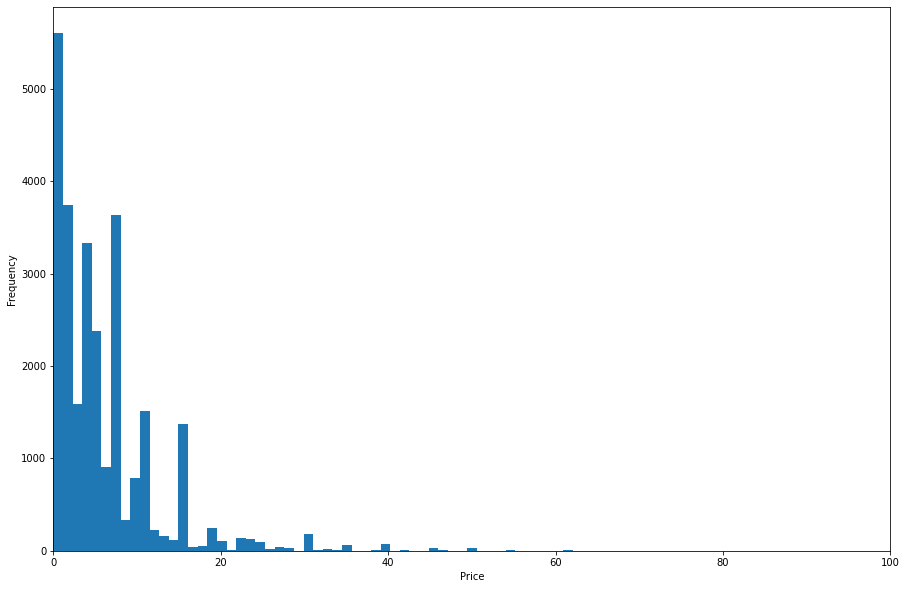

In [54]:

plt.figure()
price.plot(kind = 'hist', bins = 100, xlim=(0,100), figsize=(15,10))
plt.xlabel('Price')
plt.show()